## AIR QUALITY PREDICTION USING AQI INDEX

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stat
import pylab 
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from ydata_profiling import ProfileReport

In [2]:
Air_data = pd.read_csv("city_day.csv")
Air_data.head(10)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
5,Ahmedabad,2015-01-06,NaN,NaN,45.41,38.48,81.50,NaN,45.41,45.76,46.51,5.42,10.83,1.93,NaN,NaN
6,Ahmedabad,2015-01-07,NaN,NaN,112.16,40.62,130.77,NaN,112.16,32.28,33.47,0.00,0.00,0.00,NaN,NaN
7,Ahmedabad,2015-01-08,NaN,NaN,80.87,36.74,96.75,NaN,80.87,38.54,31.89,0.00,0.00,0.00,NaN,NaN
8,Ahmedabad,2015-01-09,NaN,NaN,29.16,31.00,48.00,NaN,29.16,58.68,25.75,0.00,0.00,0.00,NaN,NaN
9,Ahmedabad,2015-01-10,NaN,NaN,NaN,7.04,0.00,NaN,NaN,8.29,4.55,0.00,0.00,0.00,NaN,NaN


In [3]:
Air_data.tail(5)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory
29530,Visakhapatnam,2020-07-01,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0,Good


In [4]:
Air_data.shape

(29531, 16)

In [5]:
Air_data.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [6]:
Air_data['City'].unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [7]:
Air_data['AQI_Bucket'].unique()

array([nan, 'Poor', 'Very Poor', 'Severe', 'Moderate', 'Satisfactory',
       'Good'], dtype=object)

In [8]:
Air_data['AQI'].max()

2049.0

# EDA

In [9]:
Air_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [10]:
Air_data.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [11]:
Air_data.dtypes

City           object
Date           object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Xylene        float64
AQI           float64
AQI_Bucket     object
dtype: object

In [12]:
Air_data.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

<AxesSubplot:>

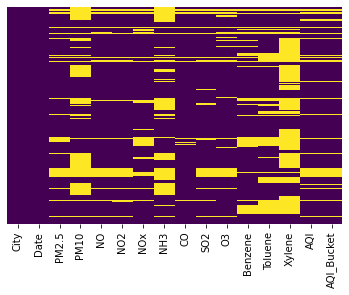

In [13]:
sns.heatmap(Air_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

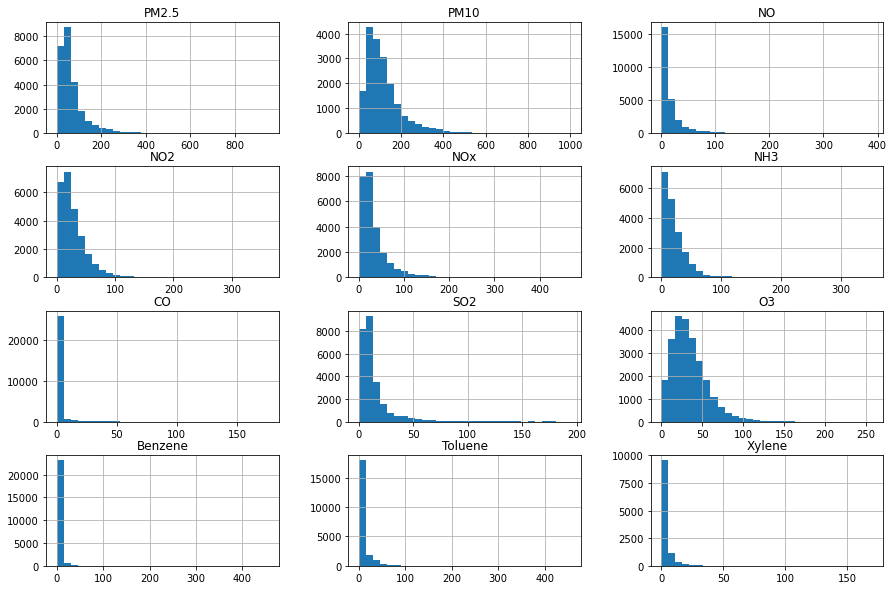

In [14]:
Air_data[[i for i in Air_data.columns if i not in ["AQI_Bucket","AQI"]]].hist(bins=30, figsize=(15, 10))
plt.show()

In [15]:
Air_data['Date'].date = pd.to_datetime(Air_data['Date'])


Air_data[['Year','Month','Day']] = Air_data['Date'].date.apply(lambda x: pd.Series(x.strftime("%Y,%m,%d").split(",")))

Air_data

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Year,Month,Day
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN,2015,01,01
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN,2015,01,02
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN,2015,01,03
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN,2015,01,04
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN,2015,01,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good,2020,06,27
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory,2020,06,28
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory,2020,06,29
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory,2020,06,30


In [16]:
Air_data.drop(['Date'], axis=1 ,inplace=True)

Air_data

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Year,Month,Day
0,Ahmedabad,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN,2015,01,01
1,Ahmedabad,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN,2015,01,02
2,Ahmedabad,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN,2015,01,03
3,Ahmedabad,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN,2015,01,04
4,Ahmedabad,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN,2015,01,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good,2020,06,27
29527,Visakhapatnam,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory,2020,06,28
29528,Visakhapatnam,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory,2020,06,29
29529,Visakhapatnam,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory,2020,06,30


In [17]:
# Arranging city wise PM 2.5 levels mean values 

a =Air_data.groupby("City")["PM2.5"].mean().round()
a


City
Ahmedabad              68.0
Aizawl                 17.0
Amaravati              38.0
Amritsar               55.0
Bengaluru              36.0
Bhopal                 50.0
Brajrajnagar           64.0
Chandigarh             41.0
Chennai                50.0
Coimbatore             29.0
Delhi                 117.0
Ernakulam              25.0
Gurugram              117.0
Guwahati               64.0
Hyderabad              47.0
Jaipur                 55.0
Jorapokhar             64.0
Kochi                  31.0
Kolkata                64.0
Lucknow               110.0
Mumbai                 35.0
Patna                 123.0
Shillong               31.0
Talcher                61.0
Thiruvananthapuram     28.0
Visakhapatnam          47.0
Name: PM2.5, dtype: float64

<AxesSubplot:title={'center':'PM 2.5 count in different cities'}, ylabel='Cities'>

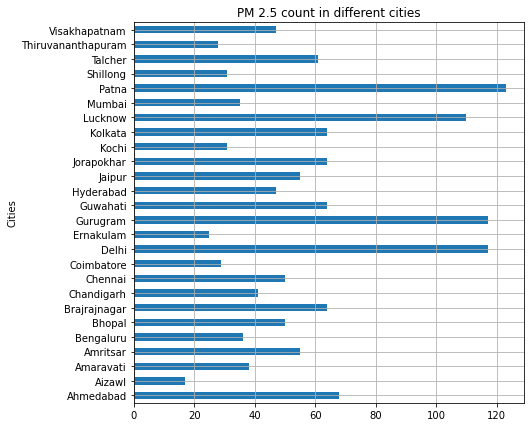

In [18]:
a.plot(figsize=(7,7),kind="barh",title="PM 2.5 count in different cities", xlabel="Cities", ylabel="PM2.5 VALUES",grid=True)

In [19]:
# Arranging city wise PM 10 levels mean values 

b = Air_data.groupby("City")["PM10"].mean().sort_values(ascending=False)
b

City
Delhi                 232.809229
Gurugram              191.504432
Talcher               165.772708
Jorapokhar            149.657942
Patna                 126.747958
Brajrajnagar          124.217373
Jaipur                123.483509
Bhopal                119.324321
Guwahati              116.604900
Kolkata               115.629499
Amritsar              115.202599
Ahmedabad             114.584029
Visakhapatnam         105.951354
Mumbai                 96.745059
Hyderabad              91.931532
Chandigarh             85.656546
Bengaluru              83.243287
Amaravati              76.362020
Kochi                  67.335432
Chennai                62.834404
Thiruvananthapuram     52.863659
Ernakulam              48.335633
Shillong               42.199170
Coimbatore             37.982137
Aizawl                 23.352857
Lucknow                      NaN
Name: PM10, dtype: float64

In [20]:
b.head(5)

City
Delhi         232.809229
Gurugram      191.504432
Talcher       165.772708
Jorapokhar    149.657942
Patna         126.747958
Name: PM10, dtype: float64

<AxesSubplot:title={'center':'PM 10 Levels in top 5 cities'}, ylabel='City'>

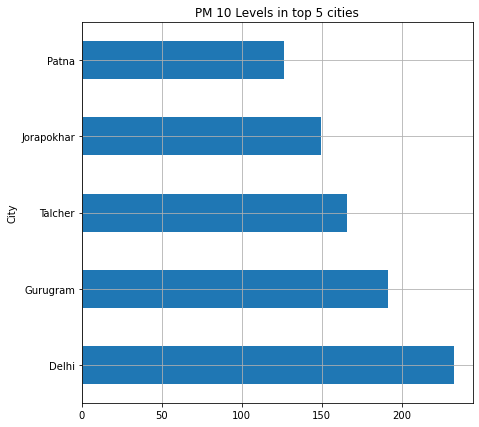

In [21]:
b.head(5).plot(figsize=(7,7),kind="barh",title="PM 10 Levels in top 5 cities", xlabel="City", ylabel="City",grid=True)

# City having high AQI  value 


City
Ahmedabad             452.0
Delhi                 259.0
Patna                 241.0
Gurugram              225.0
Lucknow               218.0
Talcher               173.0
Jorapokhar            159.0
Brajrajnagar          150.0
Kolkata               141.0
Guwahati              140.0
Jaipur                134.0
Bhopal                133.0
Amritsar              120.0
Visakhapatnam         117.0
Chennai               115.0
Hyderabad             109.0
Mumbai                105.0
Kochi                 104.0
Chandigarh             96.0
Amaravati              95.0
Bengaluru              94.0
Ernakulam              92.0
Thiruvananthapuram     76.0
Coimbatore             73.0
Shillong               54.0
Aizawl                 35.0
Name: AQI, dtype: float64


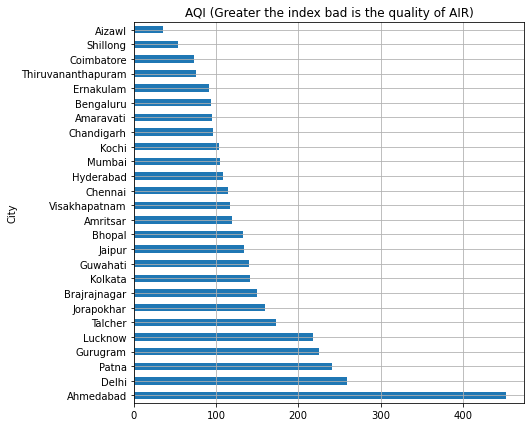

In [22]:
#obtaining the data of city wise mean AQI index and arranging it in descending order.

c =Air_data.groupby("City").mean()["AQI"].round().sort_values(ascending=False)

# Plotting the horizontal plot of  top 10 cities against high AQI value, 

c.plot(figsize=(7,7),kind="barh",title="AQI (Greater the index bad is the quality of AIR)", xlabel="City", ylabel="AQI",grid=True)
print(c)

<AxesSubplot:title={'center':'AQI index Month wise'}, ylabel='Month'>

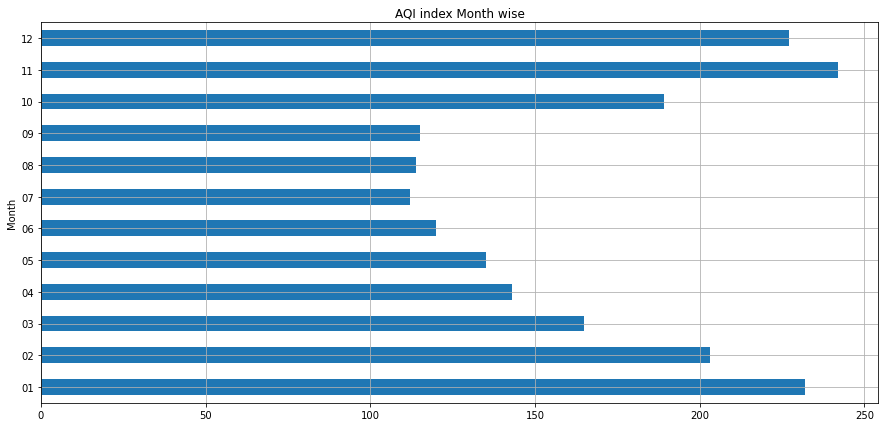

In [23]:
# Extracting the values of AQI mean values in order of Months.

d =Air_data.groupby(['Month'])["AQI"].mean().round()
d
# Plotting the horizontal plot of Months against AQI values.

d.plot(figsize=(15,7),kind="barh",title="AQI index Month wise", xlabel="Month", ylabel="AQI",grid=True)

<AxesSubplot:title={'center':'AQI index Month wise'}, ylabel='Year'>

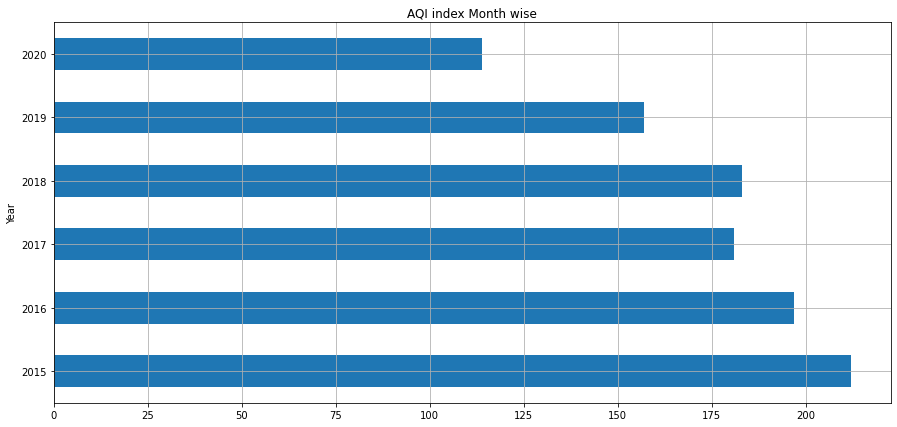

In [24]:
# Extracting the values of AQI mean values in order of Years.

e =Air_data.groupby(['Year'])["AQI"].mean().round()
e
# Plotting the horizontal plot of Months against AQI values.

e.plot(figsize=(15,7),kind="barh",title="AQI index Month wise", xlabel="Year", ylabel="AQI",grid=True)

<AxesSubplot:xlabel='PM2.5'>

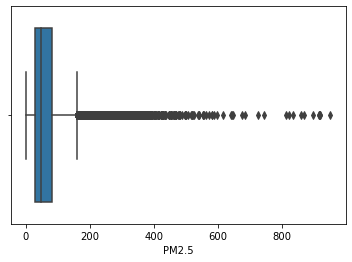

In [25]:
sns.boxplot(x=Air_data['PM2.5'])

<AxesSubplot:xlabel='PM10'>

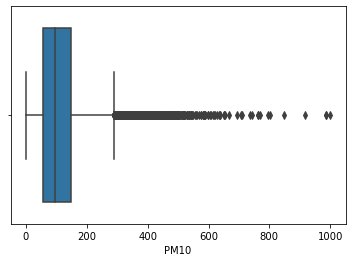

In [26]:
sns.boxplot(x=Air_data['PM10'])

# PREPROCESSING OF DATA :

In [27]:
Air_data = Air_data.dropna()
Air_data

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Year,Month,Day
2123,Amaravati,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate,2017,11,25
2124,Amaravati,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate,2017,11,26
2125,Amaravati,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate,2017,11,27
2126,Amaravati,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate,2017,11,28
2127,Amaravati,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,0.08,173.0,Moderate,2017,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29525,Visakhapatnam,7.63,32.27,5.91,23.27,17.19,11.15,0.46,6.87,19.90,1.45,5.37,1.45,47.0,Good,2020,06,26
29526,Visakhapatnam,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good,2020,06,27
29527,Visakhapatnam,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory,2020,06,28
29528,Visakhapatnam,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory,2020,06,29


In [28]:
Air_data.shape

(6236, 18)

<AxesSubplot:>

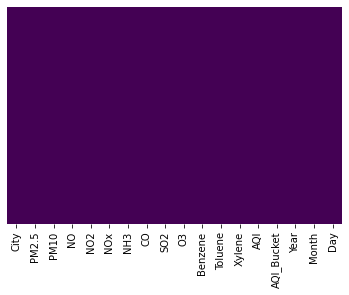

In [29]:
sns.heatmap(Air_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [30]:
Air_data['AQI_Bucket'].unique()

array(['Moderate', 'Poor', 'Very Poor', 'Satisfactory', 'Good', 'Severe'],
      dtype=object)

In [31]:
Air_data['AQI_Bucket'] = Air_data['AQI_Bucket'].map({'Good': 0, 'Moderate': 1,'Satisfactory': 2,'Poor': 3,'Very Poor': 4,'Severe': 5})
Air_data

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Year,Month,Day
2123,Amaravati,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,1,2017,11,25
2124,Amaravati,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,1,2017,11,26
2125,Amaravati,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,1,2017,11,27
2126,Amaravati,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,1,2017,11,28
2127,Amaravati,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,0.08,173.0,1,2017,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29525,Visakhapatnam,7.63,32.27,5.91,23.27,17.19,11.15,0.46,6.87,19.90,1.45,5.37,1.45,47.0,0,2020,06,26
29526,Visakhapatnam,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,0,2020,06,27
29527,Visakhapatnam,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,2,2020,06,28
29528,Visakhapatnam,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,2,2020,06,29


In [32]:
one_hot_encoder = pd.get_dummies(Air_data['City'], sparse=True)
one_hot_encoder


,Amaravati,Amritsar,Chandigarh,Delhi,Gurugram,Hyderabad,Kolkata,Patna,Visakhapatnam
2123,1,0,0,0,0,0,0,0,0
2124,1,0,0,0,0,0,0,0,0
2125,1,0,0,0,0,0,0,0,0
2126,1,0,0,0,0,0,0,0,0
2127,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
29525,0,0,0,0,0,0,0,0,1
29526,0,0,0,0,0,0,0,0,1
29527,0,0,0,0,0,0,0,0,1
29528,0,0,0,0,0,0,0,0,1


In [33]:
df_z_scaled = Air_data.copy()


column = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene']
df_z_scaled[column] = (df_z_scaled[column] - df_z_scaled[column].mean()) / df_z_scaled[column].std()


display(df_z_scaled)


,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Year,Month,Day
2123,Amaravati,0.373725,0.012608,-0.777289,-0.596687,-0.743715,-0.622634,-0.637346,0.519888,4.651924,-0.691476,-0.311193,-0.550696,184.0,1,2017,11,25
2124,Amaravati,0.316379,0.065760,-0.786272,-0.303885,-0.642576,-0.649983,-0.622599,2.155363,4.158412,-0.687525,-0.193184,-0.546286,197.0,1,2017,11,26
2125,Amaravati,0.510758,0.138728,-0.519776,-0.045687,-0.389912,-0.486510,-0.644720,3.080551,3.870486,-0.673697,-0.219227,-0.537466,198.0,1,2017,11,27
2126,Amaravati,0.053112,-0.225294,-0.721395,-0.193685,-0.563710,-0.579124,-0.659468,1.044579,5.219081,-0.697402,-0.431643,-0.548491,188.0,1,2017,11,28
2127,Amaravati,0.207460,-0.099990,-0.588147,-0.452948,-0.579045,-0.527533,-0.607851,-0.134581,3.764624,-0.689500,-0.456873,-0.546286,173.0,1,2017,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29525,Visakhapatnam,-0.999771,-1.062440,-0.554211,-0.449221,-0.557138,-0.595906,-0.386639,-0.648110,-0.829904,-0.444546,-0.403158,-0.244195,47.0,0,2020,06,26
29526,Visakhapatnam,-0.862179,-0.844819,-0.465878,-0.353928,-0.471334,-0.513859,-0.379265,-0.413673,-0.656024,-0.288486,0.142124,-0.402958,41.0,0,2020,06,27
29527,Visakhapatnam,-0.687909,-0.574979,-0.678476,-0.300691,-0.581236,-0.543694,-0.342396,0.168233,-0.306218,-0.584802,-0.660336,-0.480135,70.0,2,2020,06,28
29528,Visakhapatnam,-0.715278,-0.672425,-0.676979,-0.115960,-0.515514,-0.623256,-0.371891,-0.431814,-0.264282,-0.729009,-0.839384,-0.563926,68.0,2,2020,06,29


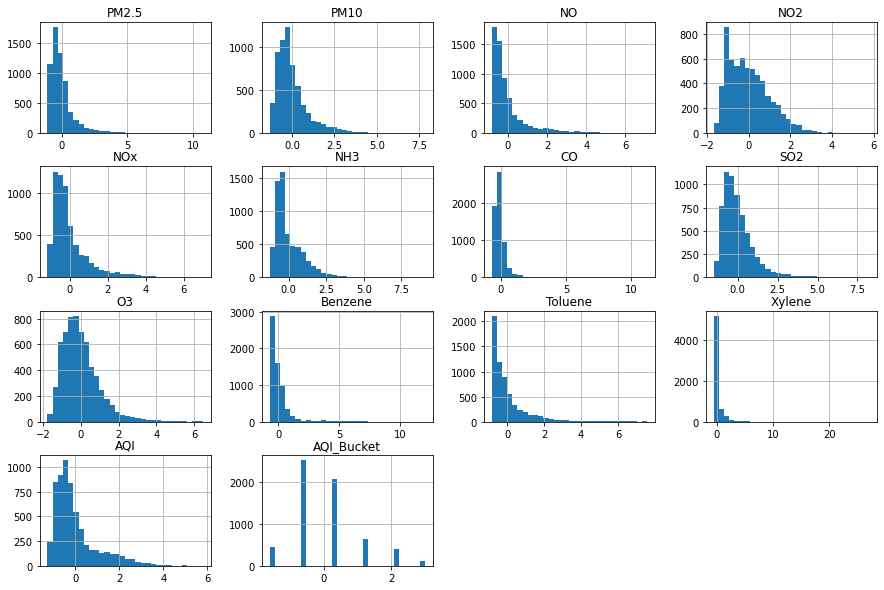

In [34]:
from sklearn.preprocessing import StandardScaler

dataset_norm_test = Air_data[[i for i in Air_data.columns if i not in ["City","Date","Year","Month","Day"]]].copy()
scaler = StandardScaler()
dataset_norm_test = pd.DataFrame(scaler.fit_transform(dataset_norm_test),columns=dataset_norm_test.columns)
dataset_norm_test.hist(bins=30, figsize=(15, 10))
plt.show()

In [35]:
cols = list(dataset_norm_test.columns.values)
cols

['PM2.5',
 'PM10',
 'NO',
 'NO2',
 'NOx',
 'NH3',
 'CO',
 'SO2',
 'O3',
 'Benzene',
 'Toluene',
 'Xylene',
 'AQI',
 'AQI_Bucket']

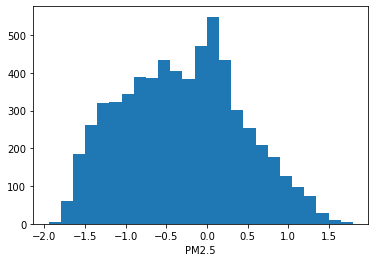

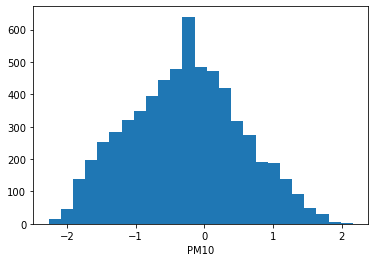

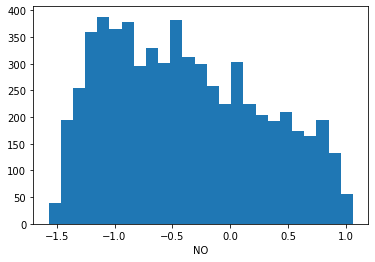

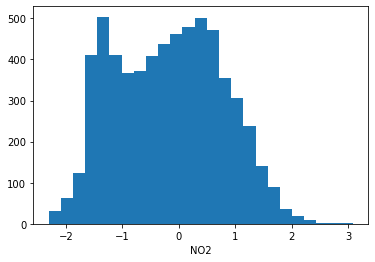

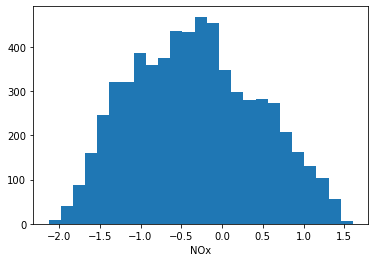

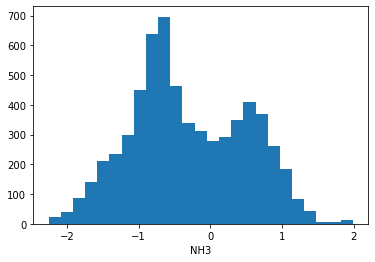

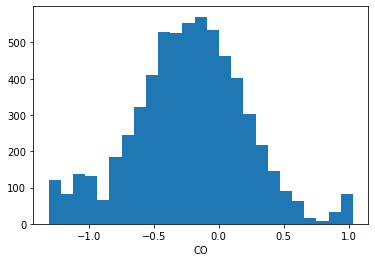

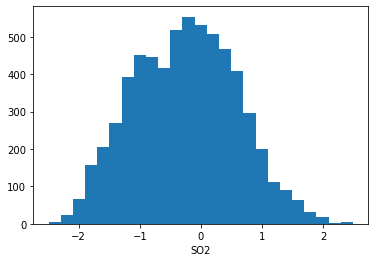

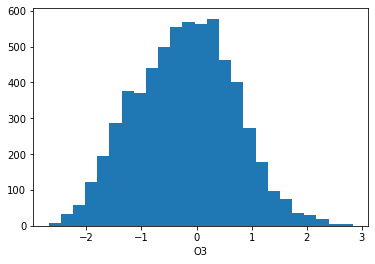

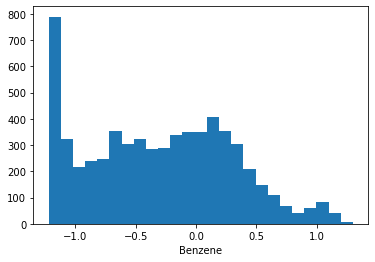

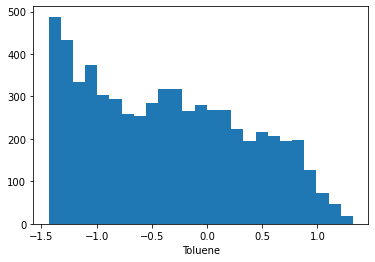

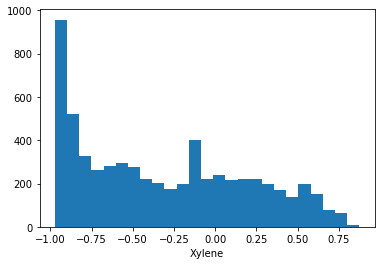

In [36]:
import scipy.stats as stats

dataset_yeo_test = dataset_norm_test[[i for i in dataset_norm_test.columns if i not in ["AQI_Bucket","AQI"]]].copy()


for i in dataset_yeo_test.columns:
    yeo_t,param = stats.yeojohnson(dataset_yeo_test[i],)
    plt.hist(yeo_t,bins=25)
    plt.xlabel(i)
    plt.show()

In [37]:
pt = PowerTransformer(method='yeo-johnson')
data = pt.fit_transform(dataset_yeo_test)
Air_dataset = pd.DataFrame(data)
Air_dataset


,0,1,2,3,4,5,6,7,8,9,10,11
0,0.842346,0.360146,-1.538760,-0.529280,-1.016817,-0.668055,-1.913532,0.816548,2.813124,-1.356564,-0.029044,-1.228128
1,0.788224,0.422788,-1.576220,-0.153332,-0.760695,-0.727845,-1.831151,1.756070,2.637549,-1.341360,0.201811,-1.206211
2,0.960787,0.503834,-0.599987,0.142776,-0.203737,-0.387248,-1.955242,2.103417,2.529831,-1.288597,0.153649,-1.162772
3,0.494503,0.037469,-1.313023,-0.022692,-0.574263,-0.575266,-2.039708,1.189742,3.002579,-1.379477,-0.299004,-1.217153
4,0.676656,0.216147,-0.824523,-0.339639,-0.609609,-0.468943,-1.750145,0.138464,2.489149,-1.348955,-0.360086,-1.206211
...,...,...,...,...,...,...,...,...,...,...,...,...
6231,-1.896284,-1.655614,-0.710918,-0.334850,-0.559247,-0.610718,-0.692930,-0.683275,-0.925284,-0.512970,-0.231949,0.003622
6232,-1.458668,-1.131814,-0.434971,-0.214671,-0.370486,-0.441431,-0.662557,-0.274251,-0.645185,-0.085845,0.691582,-0.563281
6233,-0.960698,-0.564009,-1.148153,-0.149459,-0.614694,-0.501818,-0.515157,0.494517,-0.140421,-0.965886,-0.912435,-0.893039
6234,-1.034798,-0.758631,-1.142533,0.065671,-0.465994,-0.669401,-0.632484,-0.303884,-0.085395,-1.503864,-1.490257,-1.294675


In [38]:
Air_dataset.set_axis(['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene'], axis='columns', inplace=True)
Air_dataset

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
0,0.842346,0.360146,-1.538760,-0.529280,-1.016817,-0.668055,-1.913532,0.816548,2.813124,-1.356564,-0.029044,-1.228128
1,0.788224,0.422788,-1.576220,-0.153332,-0.760695,-0.727845,-1.831151,1.756070,2.637549,-1.341360,0.201811,-1.206211
2,0.960787,0.503834,-0.599987,0.142776,-0.203737,-0.387248,-1.955242,2.103417,2.529831,-1.288597,0.153649,-1.162772
3,0.494503,0.037469,-1.313023,-0.022692,-0.574263,-0.575266,-2.039708,1.189742,3.002579,-1.379477,-0.299004,-1.217153
4,0.676656,0.216147,-0.824523,-0.339639,-0.609609,-0.468943,-1.750145,0.138464,2.489149,-1.348955,-0.360086,-1.206211
...,...,...,...,...,...,...,...,...,...,...,...,...
6231,-1.896284,-1.655614,-0.710918,-0.334850,-0.559247,-0.610718,-0.692930,-0.683275,-0.925284,-0.512970,-0.231949,0.003622
6232,-1.458668,-1.131814,-0.434971,-0.214671,-0.370486,-0.441431,-0.662557,-0.274251,-0.645185,-0.085845,0.691582,-0.563281
6233,-0.960698,-0.564009,-1.148153,-0.149459,-0.614694,-0.501818,-0.515157,0.494517,-0.140421,-0.965886,-0.912435,-0.893039
6234,-1.034798,-0.758631,-1.142533,0.065671,-0.465994,-0.669401,-0.632484,-0.303884,-0.085395,-1.503864,-1.490257,-1.294675


array([[<AxesSubplot:title={'center':'PM2.5'}>,
        <AxesSubplot:title={'center':'PM10'}>,
        <AxesSubplot:title={'center':'NO'}>],
       [<AxesSubplot:title={'center':'NO2'}>,
        <AxesSubplot:title={'center':'NOx'}>,
        <AxesSubplot:title={'center':'NH3'}>],
       [<AxesSubplot:title={'center':'CO'}>,
        <AxesSubplot:title={'center':'SO2'}>,
        <AxesSubplot:title={'center':'O3'}>],
       [<AxesSubplot:title={'center':'Benzene'}>,
        <AxesSubplot:title={'center':'Toluene'}>,
        <AxesSubplot:title={'center':'Xylene'}>]], dtype=object)

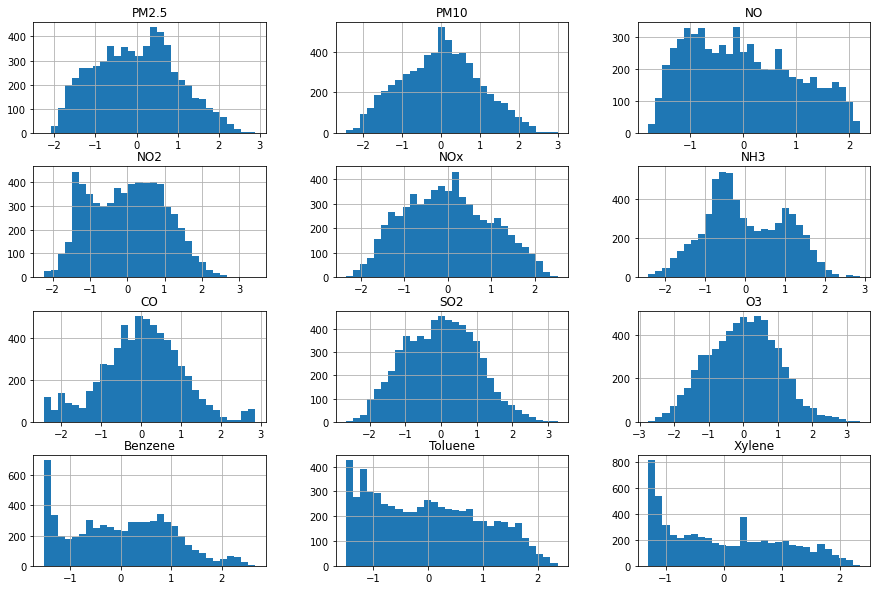

In [39]:
Air_dataset.hist(bins=30, figsize=(15, 10))

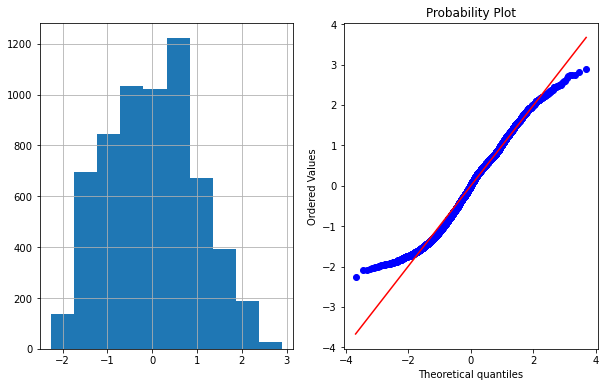

In [40]:
def plot_data(yeo_t,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    Air_dataset[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(Air_dataset[feature],dist='norm',plot=pylab)
    plt.show()
plot_data(Air_dataset,'PM2.5')
    

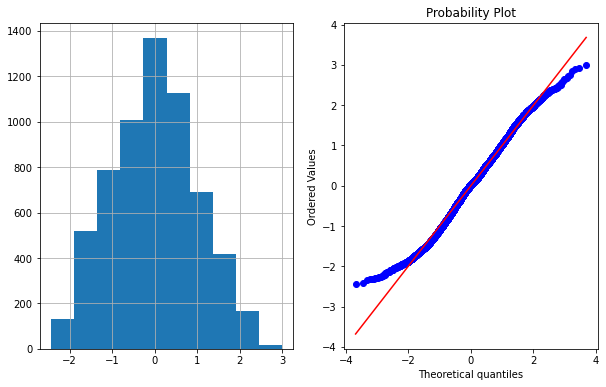

In [41]:
def plot_data(yeo_t,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    Air_dataset[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(Air_dataset[feature],dist='norm',plot=pylab)
    plt.show()
plot_data(Air_dataset,'PM10')
    

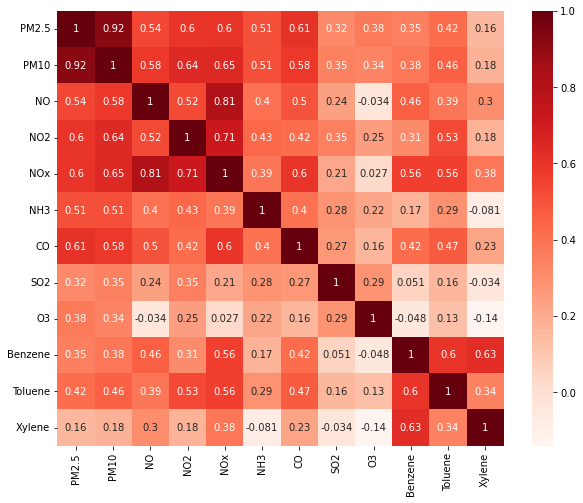

In [42]:
import seaborn as sns

dataset_corr = Air_dataset[[i for i in Air_dataset.columns if i!="AQI_Bucket"]]

plt.figure(figsize=(10,8))
cor = dataset_corr.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# MODEL IMPLEMENTATION

In [43]:
x=Air_dataset[['PM2.5','PM10','NO','NO2','NOx','CO','NH3','O3','SO2','Benzene','Toluene','Xylene']]
y=Air_data['AQI']

In [44]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.25,random_state=4)

# <h2><center>Linear Regression Model</center></h2>

In [45]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [46]:
y_pred=model.predict(x_test)

In [47]:
def metrics(y_true, y_pred):
    print(f'RMSE:', mean_squared_error(y_true, y_pred) ** 0.5)
    print(f'R2 Score:', r2_score(y_true, y_pred))

In [48]:
def accuracy(y_true,train_pred):
    error = abs(y_true -train_pred)
    mape = 100 * np.mean(error/y_true)
    accuracy = 100 - mape
    return accuracy

In [49]:
metrics(y_test,y_pred)

RMSE: 40.23951880166824
R2 Score: 0.7932452522701664


In [50]:
accuracy(y_test,y_pred)

70.87635406514742

# <h2><center>RandomForest Model</center></h2>

In [51]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
RF=RandomForestRegressor(n_estimators = 100, min_samples_split=3)
RF.fit(x_train, y_train)


RandomForestRegressor(min_samples_split=3)

In [53]:
y_pred=model.predict(x_test)

In [54]:
metrics(y_test,y_pred)

RMSE: 40.23951880166824
R2 Score: 0.7932452522701664


In [55]:
accuracy(y_test,y_pred)

70.87635406514742

# <h2><center>ExtraTreesRegressor</center></h2>

In [56]:
from sklearn.ensemble import ExtraTreesRegressor

In [57]:
selection = ExtraTreesRegressor()
selection.fit(x_train,y_train)

ExtraTreesRegressor()

In [58]:
y_pred = selection.predict(x_test)

In [59]:
metrics(y_test,y_pred)

RMSE: 22.099436503632006
R2 Score: 0.9376391057944484


In [60]:
accuracy(y_test,y_pred)

88.81803868632004

#  <h2><center>Output</center></h2>

In [61]:
# Taking Input from the User

a=float(input("PM2.5 : "))
b=float(input("PM10 : "))
c=float(input("NO : "))
d=float(input('NO2 : '))
e=float(input('NOx : '))
f=float(input('CO : '))
g=float(input('NH3 : '))
h=float(input('O3 : '))
i=float(input('SO2 : '))
j=float(input('Benzene : '))
k=float(input('Toluene : '))
l=float(input('Xylene : '))

print("="*50)


val = RF.predict([[a,b,c,d,e,f,g,h,i,j,k,l]])

if val <= 50:
    print(f'The AQI Value of {val} is Good')
elif val in range(51,100):
    print(f'The AQI Value of {val} is Unhealthy')
elif val in range(101,150):
    print(f'The AQI Value of {val} is Satisfactory')
elif val in range(151,200):
    print(f'The AQI Value of {val} is Severe')
elif val in range(201,300):
    print(f'The AQI Value of {val} is Hazardous')
else:
    print(f'The AQI Value of {val} is Dangerous')

PM2.5 : 2
PM10 : 31
NO : 85
NO2 : 7
NOx : 1
CO : 3
NH3 : 9
O3 : 0
SO2 : 7
Benzene : 5
Toluene : 22
Xylene : 4
The AQI Value of [475.81] is Dangerous
